(1000, 6)

Missing values in percentage, per column:
Could not plot linear regression line because:On entry to DLASCL parameter number 4 had an illegal value


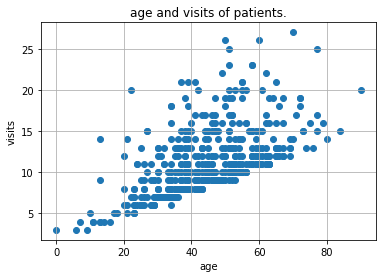

Could not plot linear regression line because:On entry to DLASCL parameter number 4 had an illegal value


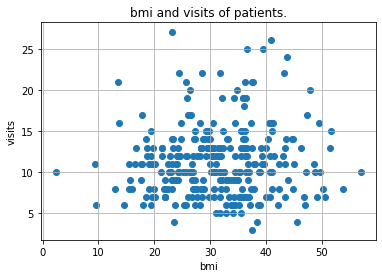

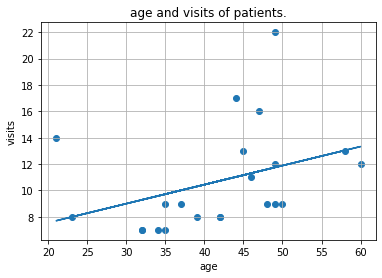

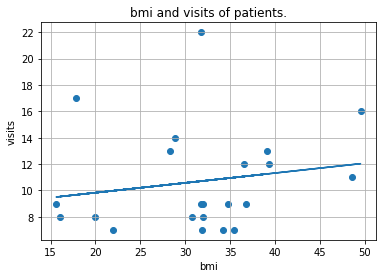

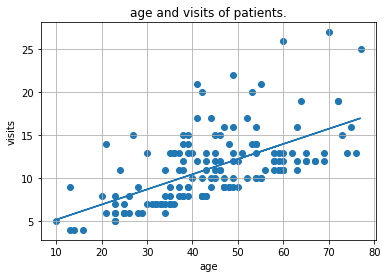

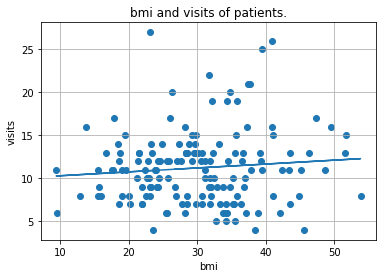

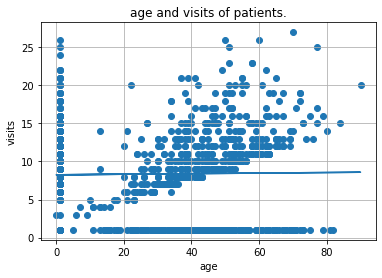

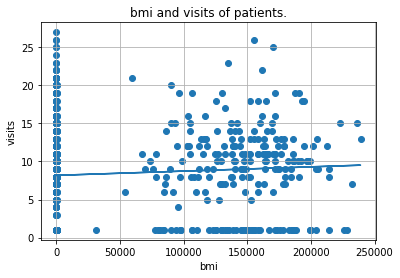

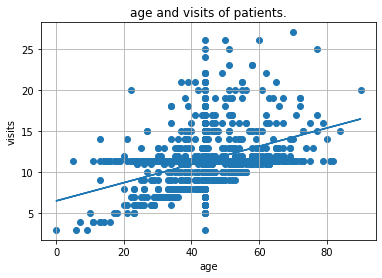

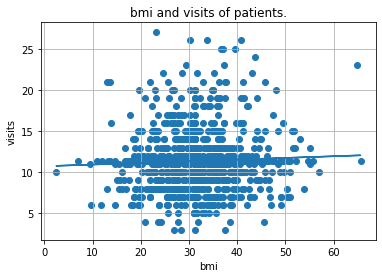

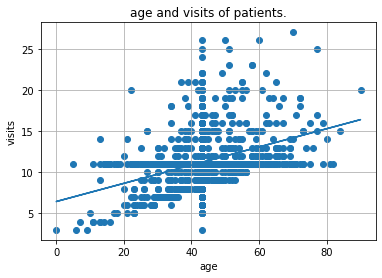

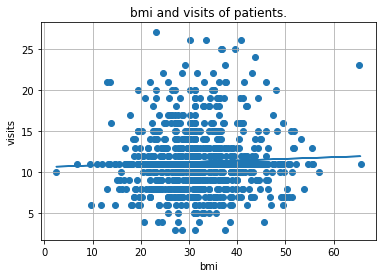

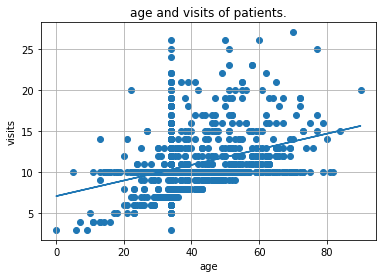

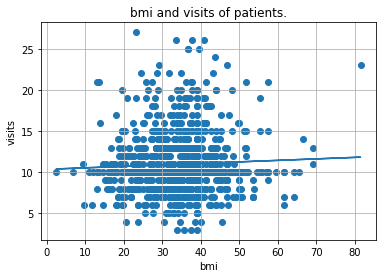

age                 0
gender            297
race/ethnicity    314
weight              2
height              1
visits              0
dtype: int64

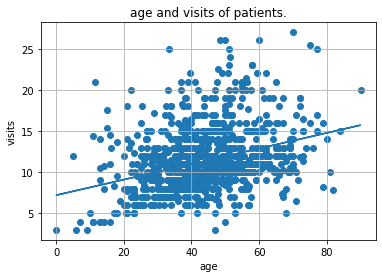

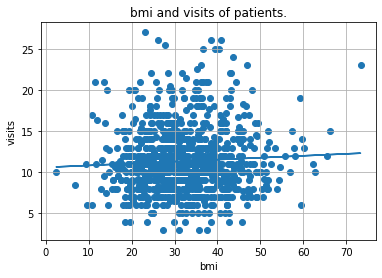

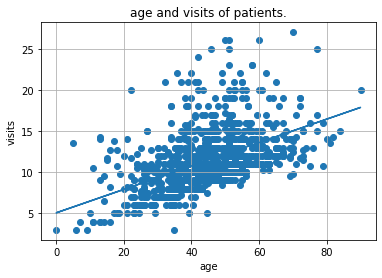

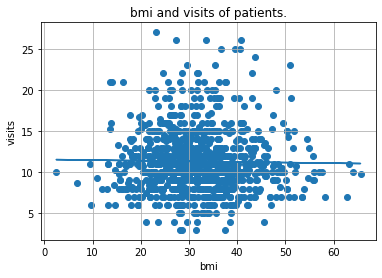

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

url = "https://github.com/WincAcademy/practice_data/raw/main/data/community_health/community_health_missing.csv"
df = pd.read_csv(url)

def get_data():
  return pd.read_csv(url)

df = get_data()

display(df.shape)
# display(df)
print("Missing values in percentage, per column:")
df.isnull().mean() * 100


import numpy.polynomial.polynomial as poly


def make_scatterplot(df, colX, colY):
  # With linear regression line
  fig, ax = plt.subplots()

  x = df[colX]
  y = df[colY]

  ax.scatter(x, y)

  # Add linear regression
  # If we pass in rows with missing values this will generate errors, so catch them here.
  try:
    coefs = poly.polyfit(x, y, 1)
    ffit = poly.polyval(x, coefs)
    plt.plot(x, ffit)
  except ValueError as error:
    print(f"Could not plot linear regression line because:{error}")

  plt.xlabel(colX)
  plt.ylabel(colY)
  plt.title(f"{colX} and {colY} of patients.")
  plt.grid()

  # fig.set_size_inches(20,10) # Make chart a little bigger

  plt.show()

def add_bmi(df):
  # ⚠️ Mutates in place
  # Weight is in pounds
  df['bmi'] = (df['weight'] / (df['height'] * df['height'])) * 703


def add_bmi_and_make_scatterplot(df, colX, colY):
  add_bmi(df)
  make_scatterplot(df, colX, colY)

# If we don't drop rows we get errors, which we'll catch in the function
make_scatterplot(df, 'age', 'visits')
add_bmi_and_make_scatterplot(df, 'bmi', 'visits')

# Drop rows with any missing values
df = get_data()
df.dropna(inplace=True)
make_scatterplot(df, 'age', 'visits')
add_bmi_and_make_scatterplot(df, 'bmi', 'visits')


# Drop rows with relevant values
df = get_data()
df.dropna(inplace=True, subset=['age', 'height', 'weight', 'visits'])
make_scatterplot(df, 'age', 'visits')
add_bmi_and_make_scatterplot(df, 'bmi', 'visits')

# Set static value
df = get_data()
df = df.copy()
df.fillna(1, inplace=True)
make_scatterplot(df, 'age', 'visits')
add_bmi_and_make_scatterplot(df, 'bmi', 'visits')

# Set mean values
df = get_data()

# We can fill certain columns if we pass a dict to df.fillna()
relevant_columns = ['age', 'height', 'weight', 'visits']
fill_values = {}
for col in relevant_columns:
  fill_values[col] = df[col].mean()
df.fillna(fill_values, inplace=True)

make_scatterplot(df, 'age', 'visits')
add_bmi_and_make_scatterplot(df, 'bmi', 'visits')

# Set median values
df = get_data()

# We can fill certain columns if we pass a dict to df.fillna()
relevant_columns = ['age', 'height', 'weight', 'visits']
fill_values = {}
for col in relevant_columns:
  fill_values[col] = df[col].median()
df.fillna(fill_values, inplace=True)

make_scatterplot(df, 'age', 'visits')
add_bmi_and_make_scatterplot(df, 'bmi', 'visits')

# Set mode values
df = get_data()

# We can fill certain columns if we pass a dict to df.fillna()
relevant_columns = ['age', 'height', 'weight', 'visits']
fill_values = {}
for col in relevant_columns:
  fill_values[col] = df[col].mode()[0] # ⚠️ .mode() returns a dataframe, not a series
df.fillna(fill_values, inplace=True)

make_scatterplot(df, 'age', 'visits')
add_bmi_and_make_scatterplot(df, 'bmi', 'visits')


# Interpolate values
df = get_data()

df.interpolate(method="linear", inplace=True)
# We still get some errors if we render the charts now, so let's so view how
# many missing values we still have.
display(df.isnull().sum())
# So let's drop the few remaining numerical rows with null values.
df.dropna(inplace=True, subset=['age', 'height', 'weight', 'visits'])

make_scatterplot(df, 'age', 'visits')
add_bmi_and_make_scatterplot(df, 'bmi', 'visits')

# KNN
df = get_data()

# Imputing with categorical values is possible but more complex. So let's skip
# those columns for now.
df.drop(columns=['gender', 'race/ethnicity'], inplace=True)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
imputed = imputer.fit_transform(df)

df2 = pd.DataFrame(data=imputed, columns = ['age','weight','height','visits'])
df2

make_scatterplot(df2, 'age', 'visits')
add_bmi_and_make_scatterplot(df2, 'bmi', 'visits')